In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='coolwarm')

In [3]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

In [4]:
print("Ratings dataset:")
display(ratings.head())

Ratings dataset:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
print("Movies dataset:")
display(movies.head())

Movies dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
print("Tags dataset:")
display(tags.head())

Tags dataset:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
print("Links dataset:")
display(links.head())

Links dataset:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
df = pd.merge(ratings, movies, on='movieId', how='left')

In [10]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [11]:
print("Duplicates:", df.duplicated().sum())
print("Missing values:\n", df.isnull().sum())

Duplicates: 0
Missing values:
 userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [13]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [14]:
df['release_year'] = df['title'].str.extract(r'\((\d{4})\)').astype(float)

In [15]:
df['num_genres'] = df['genres'].apply(lambda x: len(x.split('|')))

In [16]:
movie_avg = df.groupby('movieId')['rating'].mean().rename('avg_rating_per_movie')
df = df.merge(movie_avg, on='movieId', how='left')

In [17]:
user_avg = df.groupby('userId')['rating'].mean().rename('avg_rating_per_user')
df = df.merge(user_avg, on='userId', how='left')

In [18]:
movie_popularity = df.groupby('movieId')['rating'].count().rename('movie_popularity')
df = df.merge(movie_popularity, on='movieId', how='left')

In [19]:
df['rating_hour'] = df['timestamp'].dt.hour

In [20]:
df['decade'] = (df['release_year'] // 10 * 10).astype('Int64')

In [21]:
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0])

In [22]:
df.head()

,userId,movieId,rating,timestamp,title,genres,release_year,num_genres,avg_rating_per_movie,avg_rating_per_user,movie_popularity,rating_hour,decade,main_genre
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,5,3.920930,4.366379,215,18,1990,Adventure
1,1,3,4.0,2000-07-30 18:20:47,Grumpier Old Men (1995),Comedy|Romance,1995.0,2,3.259615,4.366379,52,18,1990,Comedy
2,1,6,4.0,2000-07-30 18:37:04,Heat (1995),Action|Crime|Thriller,1995.0,3,3.946078,4.366379,102,18,1990,Action
3,1,47,5.0,2000-07-30 19:03:35,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995.0,2,3.975369,4.366379,203,19,1990,Mystery
4,1,50,5.0,2000-07-30 18:48:51,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995.0,3,4.237745,4.366379,204,18,1990,Crime


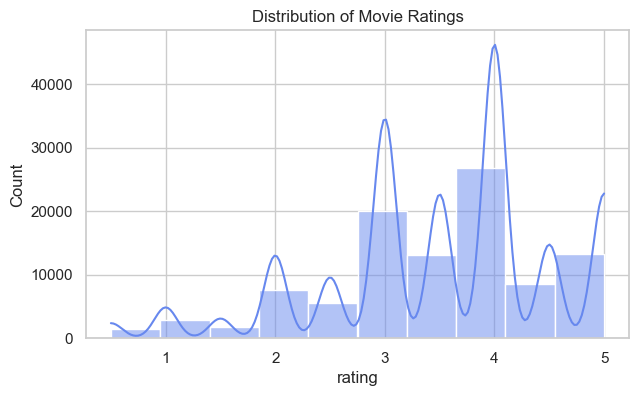

In [23]:
plt.figure(figsize=(7,4))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.show()

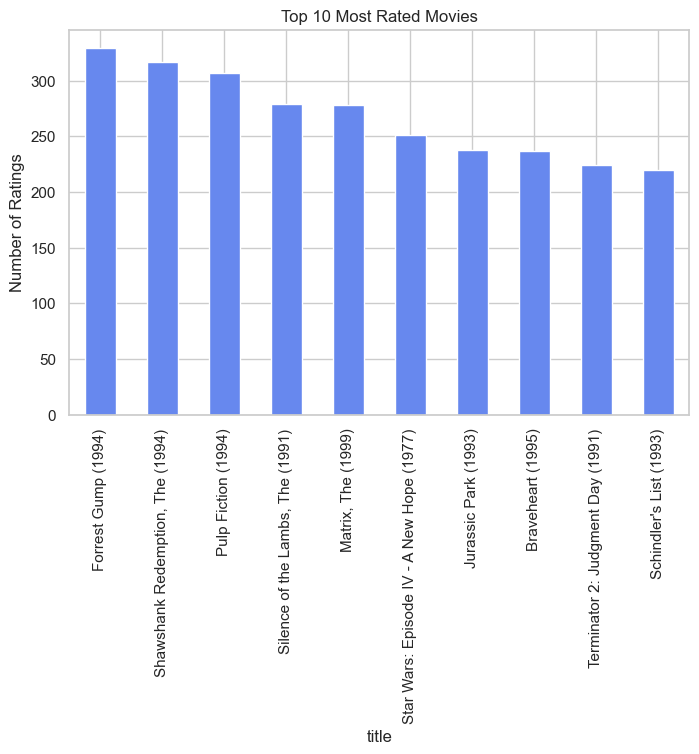

In [24]:
top_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_movies.plot(kind='bar')
plt.title("Top 10 Most Rated Movies")
plt.ylabel("Number of Ratings")
plt.show()

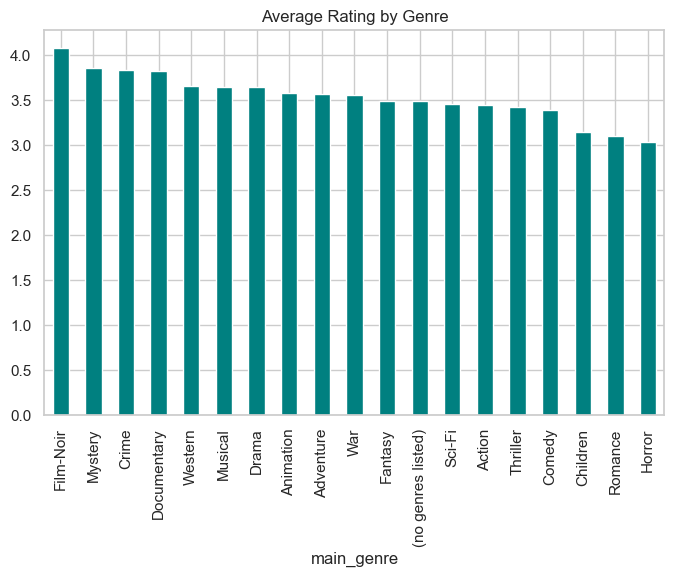

In [25]:
genre_rating = df.groupby('main_genre')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
genre_rating.plot(kind='bar', color='teal')
plt.title("Average Rating by Genre")
plt.show()

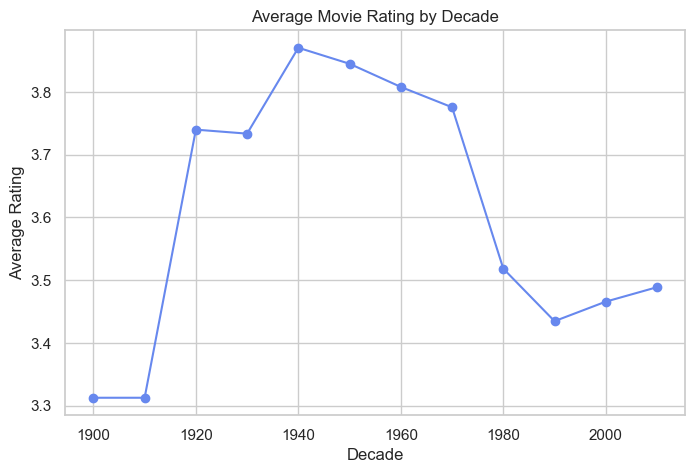

In [26]:
decade_rating = df.groupby('decade')['rating'].mean()
plt.figure(figsize=(8,5))
decade_rating.plot(marker='o')
plt.title("Average Movie Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rating")
plt.show()

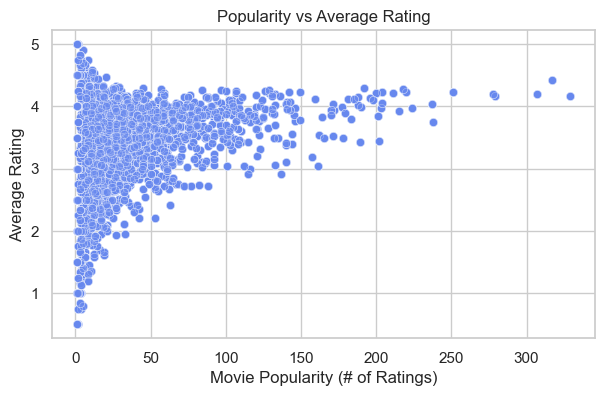

In [27]:
plt.figure(figsize=(7,4))
sns.scatterplot(x='movie_popularity', y='avg_rating_per_movie', data=df, alpha=0.5)
plt.title("Popularity vs Average Rating")
plt.xlabel("Movie Popularity (# of Ratings)")
plt.ylabel("Average Rating")
plt.show()

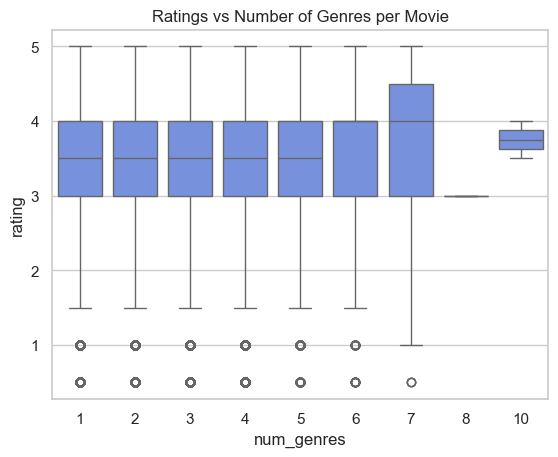

In [28]:
sns.boxplot(x='num_genres', y='rating', data=df)
plt.title("Ratings vs Number of Genres per Movie")
plt.show()

In [29]:
df.to_csv('cleaned_movielens_stage1.csv', index=False)
print("Saved")


Saved
